In [ ]:
import pandas as pd

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
dataset = pd.read_csv('hasil_labelling_data_kpu.csv')
dataset.head()

,stemming_data,Compund_Score,Compound_Score,Sentiments
0,tvonenews dampak data pilih yg bocor tsb kpu j...,0.0000,0.0000,Netral
1,gak sih mosi percaya kpu org nya piliham mukid...,0.0000,0.0000,Netral
2,msaiddidu mazing gibran dapet gilir visi misi ...,0.0000,0.0000,Netral
3,y indonesia butuh yg sok sok erti nyata nya ko...,0.5574,0.5574,Positif
4,juta data pilih bocor bobol hacker kpu buka suara,0.0000,0.0000,Netral


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183 entries, 0 to 182
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   stemming_data   183 non-null    object 
 1   Compund_Score   183 non-null    float64
 2   Compound_Score  183 non-null    float64
 3   Sentiments      183 non-null    object 
dtypes: float64(2), object(2)
memory usage: 5.8+ KB


In [ ]:
dataset.empty

False

mengubah nilai dalam kolom 'Sentiments' pada suatu dataset menjadi representasi numerik.

In [ ]:
en = LabelEncoder()

dataset['Sentiments'] = en.fit_transform(dataset['Sentiments'])
dataset.head()

,stemming_data,Compund_Score,Compound_Score,Sentiments
0,tvonenews dampak data pilih yg bocor tsb kpu j...,0.0000,0.0000,1
1,gak sih mosi percaya kpu org nya piliham mukid...,0.0000,0.0000,1
2,msaiddidu mazing gibran dapet gilir visi misi ...,0.0000,0.0000,1
3,y indonesia butuh yg sok sok erti nyata nya ko...,0.5574,0.5574,2
4,juta data pilih bocor bobol hacker kpu buka suara,0.0000,0.0000,1


In [ ]:
en = LabelEncoder()

dataset['stemming_data'] = en.fit_transform(dataset['stemming_data'])
dataset.head()

,stemming_data,Compund_Score,Compound_Score,Sentiments
0,174,0.0000,0.0000,1
1,76,0.0000,0.0000,1
2,146,0.0000,0.0000,1
3,181,0.5574,0.5574,2
4,101,0.0000,0.0000,1


untuk membagi dataset menjadi dua bagian utama: variabel independen (features) dan variabel dependen (target).

In [ ]:
x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [ ]:
x

array([[174.    ,   0.    ,   0.    ],
       [ 76.    ,   0.    ,   0.    ],
       [146.    ,   0.    ,   0.    ],
       [181.    ,   0.5574,   0.5574],
       [101.    ,   0.    ,   0.    ],
       [121.    ,   0.    ,   0.    ],
       [125.    ,   0.    ,   0.    ],
       [132.    ,  -0.2732,  -0.2732],
       [ 98.    ,   0.    ,   0.    ],
       [138.    ,   0.    ,   0.    ],
       [142.    ,   0.    ,   0.    ],
       [143.    ,   0.    ,   0.    ],
       [137.    ,   0.    ,   0.    ],
       [144.    ,   0.    ,   0.    ],
       [139.    ,   0.    ,   0.    ],
       [136.    ,   0.    ,   0.    ],
       [141.    ,   0.    ,   0.    ],
       [140.    ,   0.    ,   0.    ],
       [ 74.    ,   0.    ,   0.    ],
       [ 13.    ,   0.    ,   0.    ],
       [  0.    ,   0.    ,   0.    ],
       [129.    ,   0.    ,   0.    ],
       [ 69.    ,   0.4939,   0.4939],
       [  6.    ,   0.    ,   0.    ],
       [ 19.    ,   0.    ,   0.    ],
       [ 31.    ,   0.493

In [ ]:
y

array([1, 1, 1, 2, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1])

In [ ]:
# satu untuk pelatihan model (training set) dan satu untuk menguji model (testing set).
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=123)

print("x_train =", len(x_train))
print("x_test =", len(x_test))
print("y_train =", len(y_train))
print("y_test =", len(x_test))


x_train = 146
x_test = 37
y_train = 146
y_test = 37


In [ ]:
sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
x_train

array([[ 1.06670191, -0.05104952, -0.05104952],
       [ 0.42652132, -0.05104952, -0.05104952],
       [-1.49402046, -0.05104952, -0.05104952],
       [ 0.93090603, -0.05104952, -0.05104952],
       [-0.36885457, -0.05104952, -0.05104952],
       [-0.23305869, -0.05104952, -0.05104952],
       [-0.13606163, -0.05104952, -0.05104952],
       [-0.01966516, -0.05104952, -0.05104952],
       [-0.46585163, -4.77790136, -4.77790136],
       [-0.77624222, -0.05104952, -0.05104952],
       [ 0.0773319 , -0.05104952, -0.05104952],
       [ 0.75631132, -0.05104952, -0.05104952],
       [-0.07786339, -0.05104952, -0.05104952],
       [ 0.40712191, -0.05104952, -0.05104952],
       [-0.33005575, -0.05104952, -0.05104952],
       [-1.37762399, -0.05104952, -0.05104952],
       [ 0.09673131, -0.05104952, -0.05104952],
       [ 1.20249779, -0.05104952, -0.05104952],
       [-1.82381047, -0.05104952, -0.05104952],
       [-0.11666222, -0.05104952, -0.05104952],
       [ 1.26069603, -0.05104952, -0.051

In [ ]:
x_test

array([[ 6.59314260e-01, -5.10495166e-02, -5.10495166e-02],
       [ 3.68323081e-01, -5.10495166e-02, -5.10495166e-02],
       [ 1.49348897e+00, -5.10495166e-02, -5.10495166e-02],
       [ 1.35530138e-01, -5.10495166e-02, -5.10495166e-02],
       [-1.16423046e+00, -5.10495166e-02, -5.10495166e-02],
       [-1.10603223e+00, -5.10495166e-02, -5.10495166e-02],
       [ 1.47408956e+00, -5.10495166e-02, -5.10495166e-02],
       [-1.57161811e+00, -5.10495166e-02, -5.10495166e-02],
       [-1.59101752e+00, -5.10495166e-02, -5.10495166e-02],
       [-9.70236342e-01, -5.10495166e-02, -5.10495166e-02],
       [ 1.28009544e+00, -5.10495166e-02, -5.10495166e-02],
       [ 1.43529074e+00, -5.10495166e-02, -5.10495166e-02],
       [-8.73239282e-01, -5.10495166e-02, -5.10495166e-02],
       [ 1.10550073e+00, -5.10495166e-02, -5.10495166e-02],
       [-1.39702340e+00, -5.10495166e-02, -5.10495166e-02],
       [-4.07653396e-01, -5.10495166e-02, -5.10495166e-02],
       [-2.65745369e-04, -5.10495166e-02

In [ ]:
y_train

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
y_test

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
#untuk membuat dan melatih model klasifikasi menggunakan algoritma Gaussian Naive Bayes.
classifier = GaussianNB()
classifier.fit(x_train,y_train)

GaussianNB()

In [ ]:
y_pred = classifier.predict(x_test)
y_pred


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
classifier.predict_proba(x_test)

array([[3.15598438e-15, 1.00000000e+00, 6.51123916e-35],
       [2.61856785e-15, 1.00000000e+00, 6.95541777e-35],
       [4.24894874e-15, 1.00000000e+00, 5.39689862e-35],
       [2.18671774e-15, 1.00000000e+00, 7.33387951e-35],
       [4.82655834e-16, 1.00000000e+00, 9.88925287e-35],
       [5.25977120e-16, 1.00000000e+00, 9.75665820e-35],
       [4.23659521e-15, 1.00000000e+00, 5.42037477e-35],
       [2.52037891e-16, 1.00000000e+00, 1.08724937e-34],
       [2.43847463e-16, 1.00000000e+00, 1.09218212e-34],
       [6.38513943e-16, 1.00000000e+00, 9.45453310e-35],
       [4.07209151e-15, 1.00000000e+00, 5.66119354e-35],
       [4.20958727e-15, 1.00000000e+00, 5.46765318e-35],
       [7.29174776e-16, 1.00000000e+00, 9.24480120e-35],
       [3.86596811e-15, 1.00000000e+00, 5.88765793e-35],
       [3.36409310e-16, 1.00000000e+00, 1.04390048e-34],
       [1.29059435e-15, 1.00000000e+00, 8.30446368e-35],
       [1.94369492e-15, 1.00000000e+00, 7.56468098e-35],
       [5.88274444e-16, 1.00000

In [ ]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[36  0]
 [ 0  1]]


In [ ]:
akurasi = classification_report(y_test, y_pred)
print(akurasi)

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        36
           2       1.00      1.00      1.00         1

    accuracy                           1.00        37
   macro avg       1.00      1.00      1.00        37
weighted avg       1.00      1.00      1.00        37



In [ ]:
akurasi = accuracy_score(y_test, y_pred)
print("Tingkat akurasi:", akurasi)

Tingkat akurasi: 1.0


In [ ]:
ydata = pd.DataFrame()
ydata['y_test'] = pd.DataFrame(y_test)
ydata['y_pred'] = pd.DataFrame(y_pred)
ydata

,y_test,y_pred
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1
5,1,1
6,1,1
7,1,1
8,1,1
9,1,1


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score,recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [ ]:
# Membuat confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
labels = ['Negatif', 'Neutral', 'Positif']

Confusion Matrix:


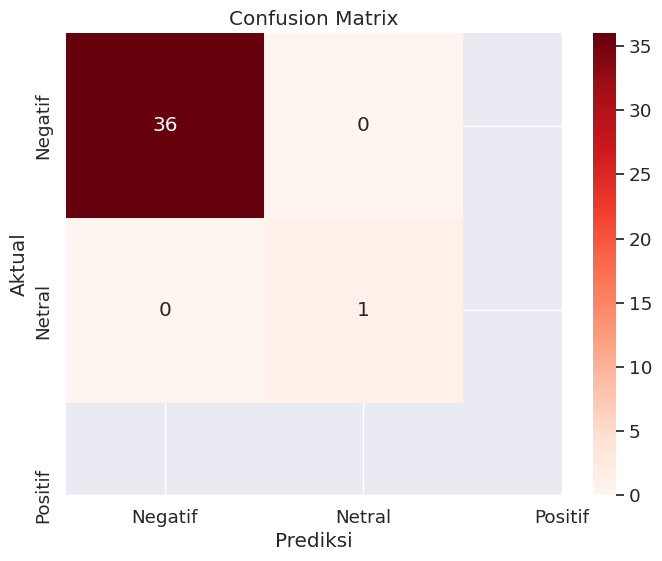

Jumlah prediksi Benar: 37
Jumlah Prediksi Salah: 0
Akurasi pengujian: 100.0

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        36
           2       1.00      1.00      1.00         1

    accuracy                           1.00        37
   macro avg       1.00      1.00      1.00        37
weighted avg       1.00      1.00      1.00        37


Hasil Klasifikasi Sentimen:
Accuracy: 1.0

Performa Model :

Accuracy: 1.0
error_rate: 0.0


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Membuat heatmap dari confusion matrix
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Penyesuaian skala font agar sesuai
cm = confusion_matrix(y_test, y_pred)
labels = ['Negatif', 'Netral', 'Positif']
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds", xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix")
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.show()

# Menghitung metrik evaluasi
pred_benar = (y_test == y_pred).sum()
pred_salah = (y_test != y_pred).sum()
accuracy = pred_benar / (pred_benar + pred_salah) * 100

print("Jumlah prediksi Benar:", pred_benar)
print("Jumlah Prediksi Salah:", pred_salah)
print("Akurasi pengujian:", accuracy)
print('===============================================\n')
print(classification_report(y_test, y_pred, zero_division=0))
print('===============================================\n')
print("Hasil Klasifikasi Sentimen:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nPerforma Model :\n")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("error_rate:", 1 - accuracy_score(y_test, y_pred))


In [ ]:
ydata.to_csv('data_actual_pred.csv', index=False)